# Linear Regression - Project 1


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [245]:
#getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [246]:
#getting data types
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [247]:
#finding null values
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [248]:
df.rename(columns={'year':'Year','make':'Make','model':'Model','trim':'Trim','body':'Body', 'transmission':'Transmission','vin':'Vin','state':'State','condition':'Condition','odometer':'Odometer','color':'Color','interior':'Interior','seller':'Seller','sellingprice':'Selling Price','saledate':'Sale Date'},inplace=True)
df

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,mmr,Selling Price,Sale Date
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [249]:
# Removing all the random characters, we only want the values from 0-9, and the + sign makes it loop
df['Selling Price'] = df['Selling Price'].str.extract('([0-9]+)', expand=False).astype(int)

In [250]:
# Removing all the random characters, we only want the values from 0-9, and the + sign makes it loop
df['Odometer']= df['Odometer'].str.extract('([0-9]+)', expand=False).astype(int)


In [251]:
# Removing all the random characters, we only want the values from 0-9, and the + sign makes it loop
df['mmr']=df['mmr'].str.extract('([0-9]+)', expand=False).astype(int)

In [252]:
df.Body.nunique()

71

In [253]:
#turning the data into lower case
df['Body'] = df.Body.str.lower()
df.Body

0               sedan
1                 suv
2               sedan
3                 suv
4        e-series van
             ...     
46573             suv
46574         g sedan
46575           sedan
46576           sedan
46577           sedan
Name: Body, Length: 46578, dtype: object

In [254]:
df.Body.value_counts()

sedan                      20857
suv                        11936
hatchback                   2270
minivan                     2189
coupe                       1563
wagon                       1434
crew cab                    1409
convertible                  919
supercrew                    740
g sedan                      717
supercab                     433
regular cab                  399
extended cab                 397
van                          332
quad cab                     318
g coupe                      170
double cab                   137
e-series van                 100
crewmax cab                   52
king cab                      40
g convertible                 30
genesis coupe                 22
access cab                    19
club cab                      17
koup                          12
cts coupe                     10
promaster cargo van           10
beetle convertible             9
mega cab                       8
elantra coupe                  6
xtracab   

In [255]:
#extracting substrings
df['Body']=df['Body'].apply(lambda x: 'wagon' if 'wagon' in x else x)
df['Body']=df['Body'].apply(lambda x: 'convertible' if 'convertible' in x else x)
df['Body']=df['Body'].apply(lambda x: 'sedan' if 'sedan' in x else x)
df['Body']=df['Body'].apply(lambda x: 'minivan' if 'van' in x else x)
df[ 'Body']=df['Body'].apply(lambda x: 'coupe' if 'coupe' in x else x)
df['Body']=df['Body'].apply(lambda x: 'pickup truck' if 'cab' in x else x)
df['Body']=df['Body'].apply(lambda x: 'pickup truck' if 'super' in x else x)
df['Body']=df['Body'].apply(lambda x: 'sedan' if 'koup' in x else x)

                    

In [256]:
df.Body.unique()

array(['sedan', 'suv', 'minivan', 'pickup truck', 'wagon', 'coupe',
       'convertible', 'hatchback'], dtype=object)

In [257]:
#There were no null values, but some values had — so they had to be filled We could not drop the rows with — values , because they will affect the data replacing — with null we used forward filling to fill the empty values
df['Interior'].replace('—',np.nan,inplace=True)
df['Interior'].ffill(inplace=True)

In [258]:
df['Sale Date']=pd.to_datetime(df['Sale Date'])

In [259]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,mmr,Selling Price,Sale Date
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-18 06:45:00+08:00


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot:xlabel='Color', ylabel='count'>

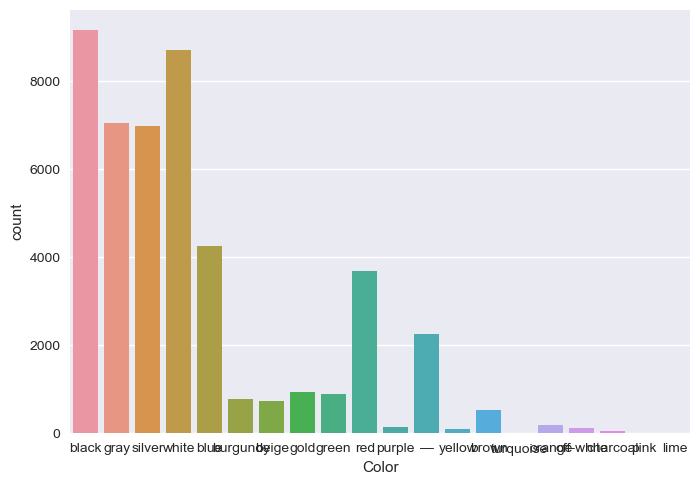

In [260]:
# Basic, minimal plot example
sns.countplot(x='Color', data=df)

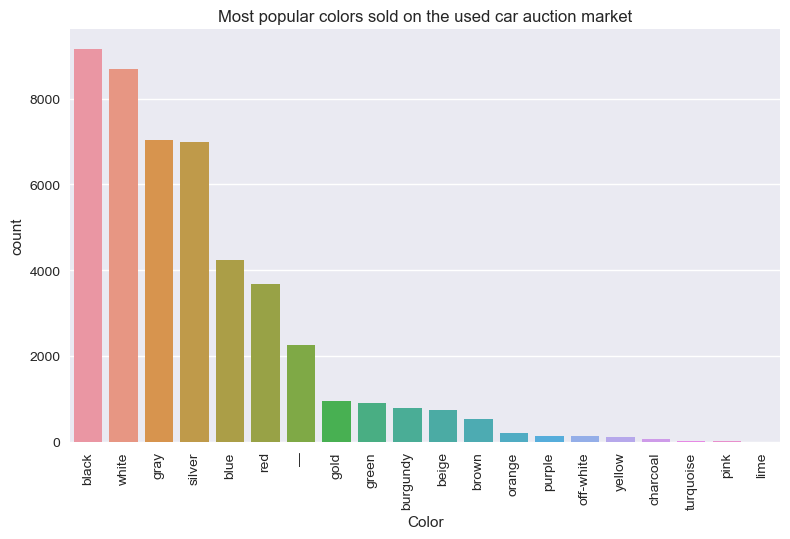

In [261]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('Color').size().sort_values(ascending=False)
sns.countplot(x='Color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

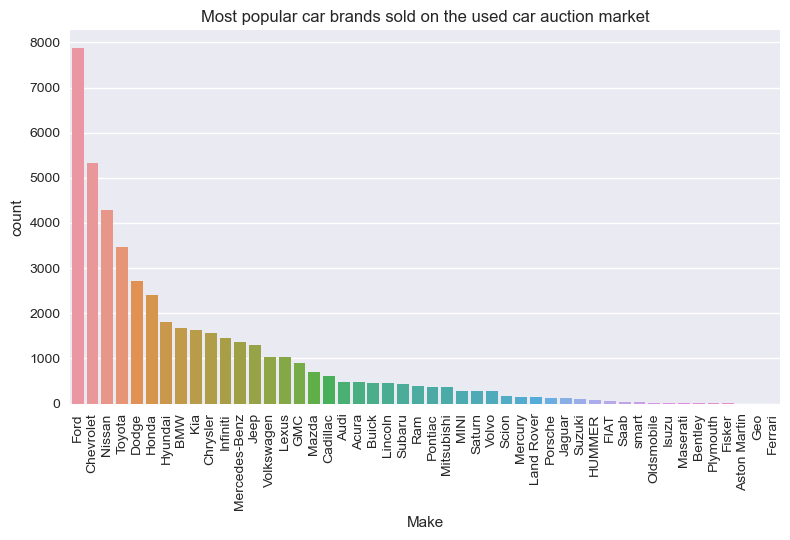

In [262]:
descending = df.groupby('Make').size().sort_values(ascending=False)
sns.countplot(x='Make', data=df, order=descending.index).set(title='Most popular car brands sold on the used car auction market')
sns.countplot(x='Make', data=df,order=descending.index)
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q1**: Ford,Chevrolet,Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

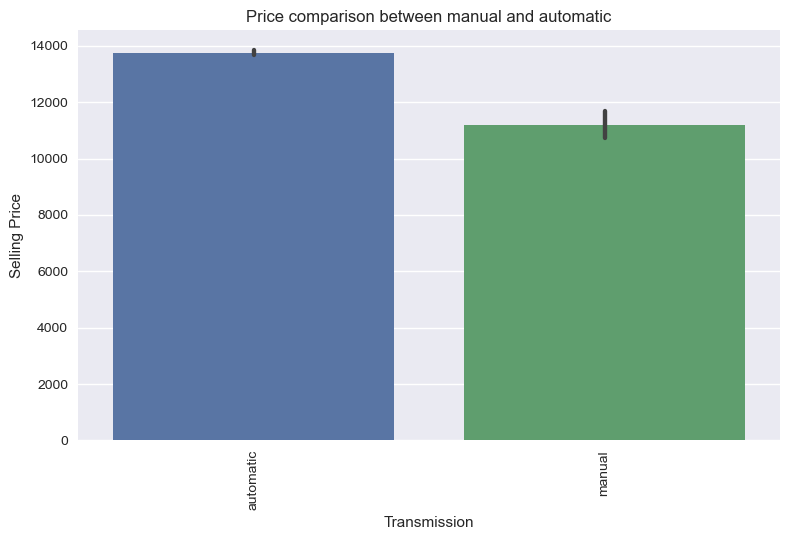

In [263]:
descending = df.groupby('Transmission').size().sort_values(ascending=False)
sns.barplot(x='Transmission', y='Selling Price', data=df, order=descending.index).set(title='Price comparison between manual and automatic')
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q2**: Automatic

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

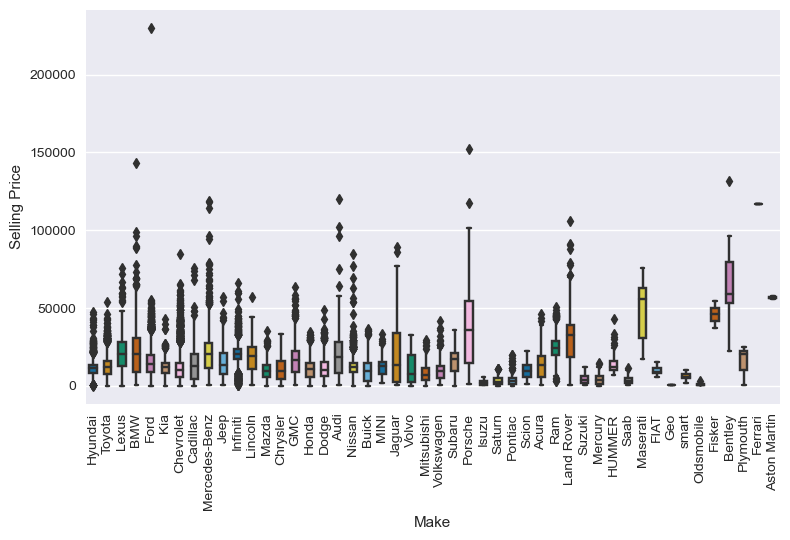

In [264]:
sns.boxplot(y='Selling Price', x='Make', data=df, width=0.5, palette="colorblind")
plt.xticks(rotation=90)
plt.tight_layout()


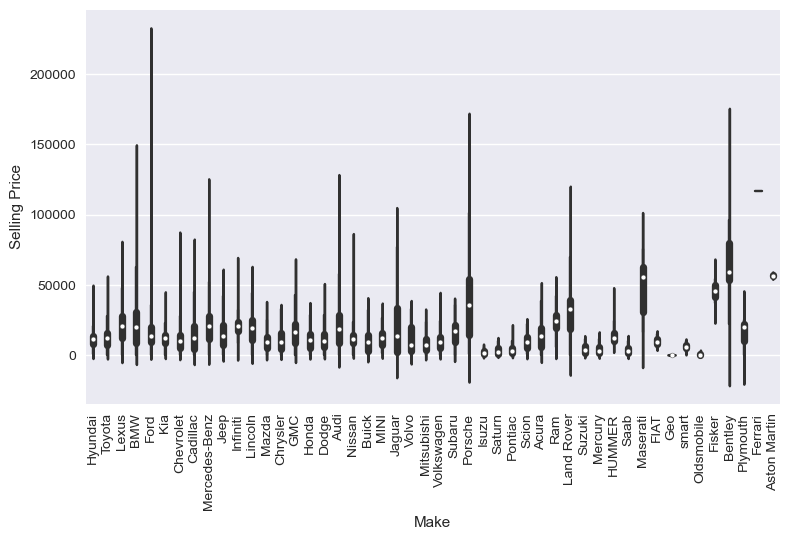

In [265]:
sns.violinplot(y='Selling Price', x='Make', data=df, width=0.5, palette="colorblind")
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q3**: Widest distribution: Maserati, Porsche . Most expensive : Ford, Porsche

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

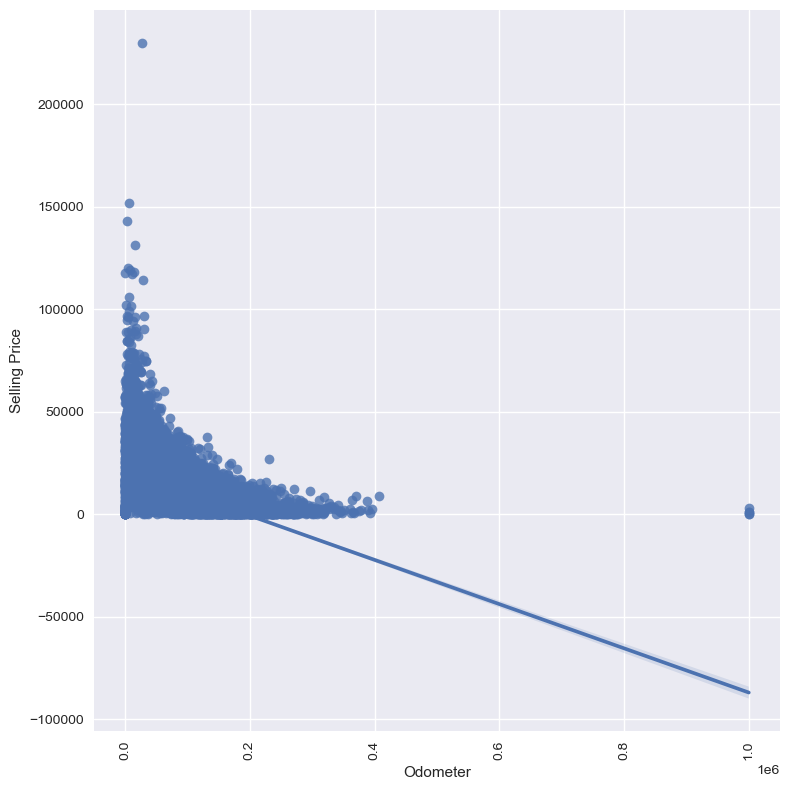

In [266]:

sns.lmplot(x='Odometer', y='Selling Price', data=df, palette='magma',  height=8);
plt.xticks(rotation=90)
plt.tight_layout()

             


**Answer for Q4**: Negatively correlated

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

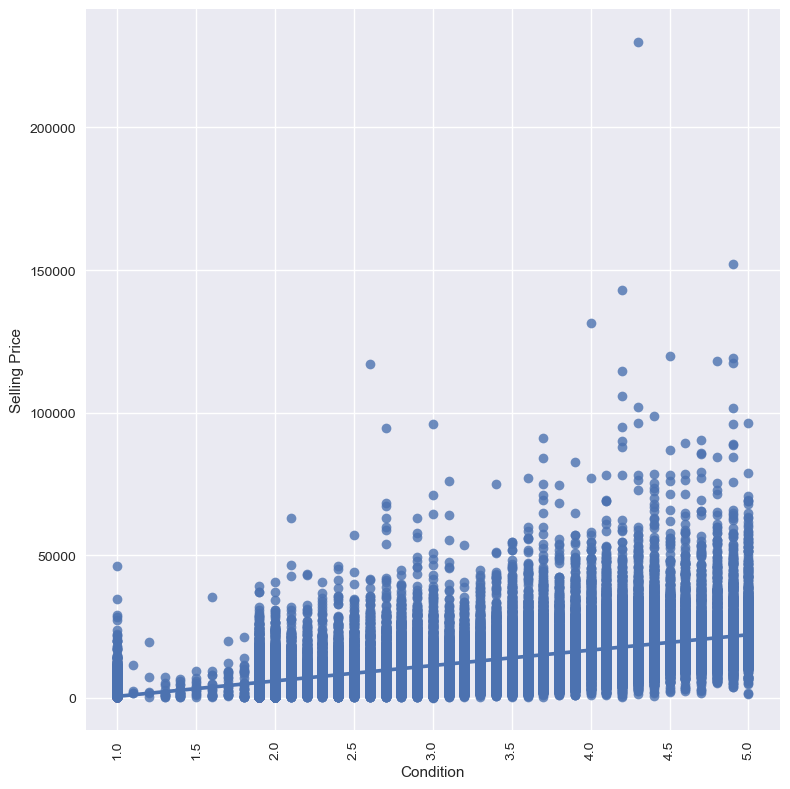

In [267]:

sns.lmplot(x='Condition', y='Selling Price', data=df, palette='magma',  height=8);
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q5**: Positively correlated

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

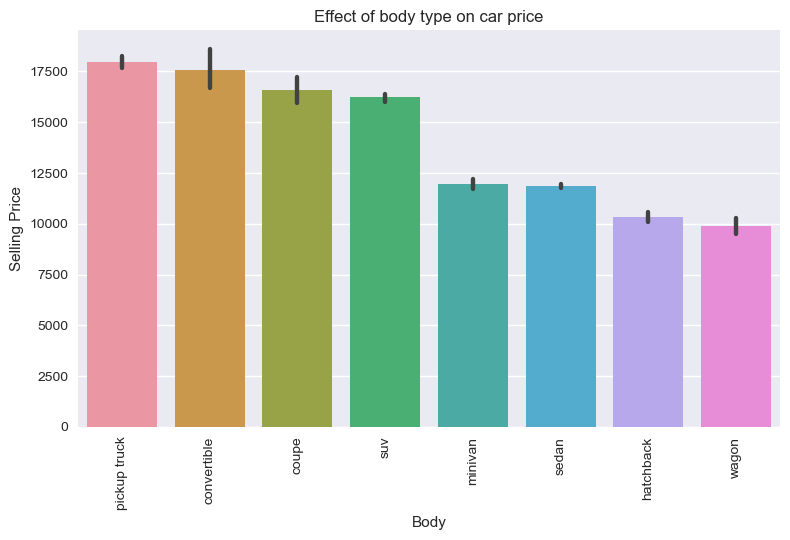

In [268]:
descending = df.groupby('Body')['Selling Price'].mean().sort_values(ascending=False)
sns.barplot(x='Body', y='Selling Price', data=df, order=descending.index).set(title='Effect of body type on car price')
plt.xticks(rotation=90)
plt.tight_layout()

In [269]:
df.Body.unique()

array(['sedan', 'suv', 'minivan', 'pickup truck', 'wagon', 'coupe',
       'convertible', 'hatchback'], dtype=object)

**Answer for Q6**: Most expensive : Pickup truck, Least expensive: Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [270]:

#corr=df.corr()
#corr

In [271]:
#Dropped sale date as it does not affect the price of the car, the sale date has no correlation with the selling price.
df=df.drop(columns=['Sale Date'])
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,mmr,Selling Price
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200
4,2014,Ford,E-Series Van,E-250,minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100


In [272]:
#dropped vin, as it is the car’s unique number so it does not affect the selling price dropped mmr as it had a high correlation, so that would affect the model dropped body as the price does not depend on the car’s body
df=df.drop(columns=['Vin','mmr','Body'])
df.head()

,Year,Make,Model,Trim,Transmission,State,Condition,Odometer,Color,Interior,Seller,Selling Price
0,2013,Hyundai,Sonata,GLS,automatic,ma,3.9,50404,black,gray,the hertz corporation,10900
1,2014,Toyota,4Runner,SR5,automatic,fl,4.9,17846,gray,gray,award auto sales and leasing inc,29900
2,2012,Lexus,IS 250,Base,automatic,fl,4.1,21122,silver,black,lexus financial services,24200
3,2002,BMW,X5,4.4i,automatic,fl,1.9,145303,black,black,peddle llc,3200
4,2014,Ford,E-Series Van,E-250,automatic,wa,4.9,6714,white,gray,u-haul,22100


In [273]:
#dropping as unneeded
df=df.drop(columns=['State','Interior'])
df.head()

,Year,Make,Model,Trim,Transmission,Condition,Odometer,Color,Seller,Selling Price
0,2013,Hyundai,Sonata,GLS,automatic,3.9,50404,black,the hertz corporation,10900
1,2014,Toyota,4Runner,SR5,automatic,4.9,17846,gray,award auto sales and leasing inc,29900
2,2012,Lexus,IS 250,Base,automatic,4.1,21122,silver,lexus financial services,24200
3,2002,BMW,X5,4.4i,automatic,1.9,145303,black,peddle llc,3200
4,2014,Ford,E-Series Van,E-250,automatic,4.9,6714,white,u-haul,22100


In [274]:
#dropping as unneeded
df=df.drop(columns=['Seller'])
df.head()

,Year,Make,Model,Trim,Transmission,Condition,Odometer,Color,Selling Price
0,2013,Hyundai,Sonata,GLS,automatic,3.9,50404,black,10900
1,2014,Toyota,4Runner,SR5,automatic,4.9,17846,gray,29900
2,2012,Lexus,IS 250,Base,automatic,4.1,21122,silver,24200
3,2002,BMW,X5,4.4i,automatic,1.9,145303,black,3200
4,2014,Ford,E-Series Van,E-250,automatic,4.9,6714,white,22100


In [275]:
#encoding to turn all the data values to numerical
categorical_columns = ['Make', 'Model', 'Trim','Transmission','Color']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
df_encode.head()

,Year,Condition,Odometer,Selling Price,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Color_off-white,Color_orange,Color_pink,Color_purple,Color_red,Color_silver,Color_turquoise,Color_white,Color_yellow,Color_—
0,2013,3.9,50404,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122,24200,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2002,1.9,145303,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [276]:
#we wanted to see the correlation between the independent values to see if there’s anything that should be removed
corrx=df_encode.corr()
corrx

,Year,Condition,Odometer,Selling Price,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Color_off-white,Color_orange,Color_pink,Color_purple,Color_red,Color_silver,Color_turquoise,Color_white,Color_yellow,Color_—
Year,1.000000,0.549158,-0.777219,0.581164,-0.005479,-0.018805,-0.041495,-0.010103,-0.049946,-0.075277,...,-0.004504,0.001765,-0.003219,-0.014576,0.017511,-0.042575,-0.013758,0.060318,-0.020337,0.116535
Condition,0.549158,1.000000,-0.540371,0.529141,0.001567,0.003547,0.031729,0.001399,-0.017882,-0.023222,...,0.011066,0.000975,-0.007008,-0.010971,0.007616,-0.032640,-0.002489,0.062013,-0.002569,0.099027
Odometer,-0.777219,-0.540371,1.000000,-0.580900,-0.007428,-0.005750,-0.009054,-0.006542,0.028816,0.045084,...,-0.000461,0.002129,0.001210,0.009530,-0.024482,0.051007,0.007603,-0.022064,0.008792,-0.101909
Selling Price,0.581164,0.529141,-0.580900,1.000000,0.029308,0.069786,0.157110,0.073631,-0.036035,0.008509,...,0.009738,-0.001905,-0.007640,-0.019866,-0.020373,-0.081727,-0.006816,0.066458,-0.000230,0.093304
Make_Aston Martin,-0.005479,0.001567,-0.007428,0.029308,1.000000,-0.000672,-0.001268,-0.000086,-0.000659,-0.000752,...,-0.000345,-0.000425,-0.000053,-0.000356,-0.001921,-0.002752,-0.000118,-0.003139,-0.000302,-0.001475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color_silver,-0.042575,-0.032640,0.051007,-0.081727,-0.002752,-0.005748,-0.027040,0.003675,0.010261,0.000086,...,-0.022129,-0.027227,-0.003370,-0.022807,-0.123081,1.000000,-0.007537,-0.201148,-0.019380,-0.094517
Color_turquoise,-0.013758,-0.002489,0.007603,-0.006816,-0.000118,-0.001841,0.002945,-0.000235,-0.001806,-0.002061,...,-0.000946,-0.001164,-0.000144,-0.000975,-0.005261,-0.007537,1.000000,-0.008598,-0.000828,-0.004040
Color_white,0.060318,0.062013,-0.022064,0.066458,-0.003139,0.003519,0.007818,-0.002073,0.006550,-0.000535,...,-0.025244,-0.031059,-0.003844,-0.026017,-0.140403,-0.201148,-0.008598,1.000000,-0.022108,-0.107820
Color_yellow,-0.020337,-0.002569,0.008792,-0.000230,-0.000302,-0.004734,-0.008928,-0.000605,-0.004645,-0.005299,...,-0.002432,-0.002992,-0.000370,-0.002507,-0.013527,-0.019380,-0.000828,-0.022108,1.000000,-0.010388


In [277]:
corrx

,Year,Condition,Odometer,Selling Price,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Color_off-white,Color_orange,Color_pink,Color_purple,Color_red,Color_silver,Color_turquoise,Color_white,Color_yellow,Color_—
Year,1.000000,0.549158,-0.777219,0.581164,-0.005479,-0.018805,-0.041495,-0.010103,-0.049946,-0.075277,...,-0.004504,0.001765,-0.003219,-0.014576,0.017511,-0.042575,-0.013758,0.060318,-0.020337,0.116535
Condition,0.549158,1.000000,-0.540371,0.529141,0.001567,0.003547,0.031729,0.001399,-0.017882,-0.023222,...,0.011066,0.000975,-0.007008,-0.010971,0.007616,-0.032640,-0.002489,0.062013,-0.002569,0.099027
Odometer,-0.777219,-0.540371,1.000000,-0.580900,-0.007428,-0.005750,-0.009054,-0.006542,0.028816,0.045084,...,-0.000461,0.002129,0.001210,0.009530,-0.024482,0.051007,0.007603,-0.022064,0.008792,-0.101909
Selling Price,0.581164,0.529141,-0.580900,1.000000,0.029308,0.069786,0.157110,0.073631,-0.036035,0.008509,...,0.009738,-0.001905,-0.007640,-0.019866,-0.020373,-0.081727,-0.006816,0.066458,-0.000230,0.093304
Make_Aston Martin,-0.005479,0.001567,-0.007428,0.029308,1.000000,-0.000672,-0.001268,-0.000086,-0.000659,-0.000752,...,-0.000345,-0.000425,-0.000053,-0.000356,-0.001921,-0.002752,-0.000118,-0.003139,-0.000302,-0.001475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color_silver,-0.042575,-0.032640,0.051007,-0.081727,-0.002752,-0.005748,-0.027040,0.003675,0.010261,0.000086,...,-0.022129,-0.027227,-0.003370,-0.022807,-0.123081,1.000000,-0.007537,-0.201148,-0.019380,-0.094517
Color_turquoise,-0.013758,-0.002489,0.007603,-0.006816,-0.000118,-0.001841,0.002945,-0.000235,-0.001806,-0.002061,...,-0.000946,-0.001164,-0.000144,-0.000975,-0.005261,-0.007537,1.000000,-0.008598,-0.000828,-0.004040
Color_white,0.060318,0.062013,-0.022064,0.066458,-0.003139,0.003519,0.007818,-0.002073,0.006550,-0.000535,...,-0.025244,-0.031059,-0.003844,-0.026017,-0.140403,-0.201148,-0.008598,1.000000,-0.022108,-0.107820
Color_yellow,-0.020337,-0.002569,0.008792,-0.000230,-0.000302,-0.004734,-0.008928,-0.000605,-0.004645,-0.005299,...,-0.002432,-0.002992,-0.000370,-0.002507,-0.013527,-0.019380,-0.000828,-0.022108,1.000000,-0.010388


## Modelling

_Apply the linear regression model below._

In [278]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('Selling Price',axis=1) # Independent variable
y = df_encode['Selling Price'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [279]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);


In [280]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.026050e+06
1,theta_1,Year,1.018117e+03
2,theta_2,Condition,1.275911e+03
3,theta_3,Odometer,-4.417915e-02
4,theta_4,Make_Aston Martin,1.892134e+04
...,...,...,...
1809,theta_1809,Color_silver,-2.792019e+02
1810,theta_1810,Color_turquoise,-1.782522e+03
1811,theta_1811,Color_white,-4.644005e+01
1812,theta_1812,Color_yellow,1.917827e+02


## Model Evaluation

_Evaluate the model you applied._

In [281]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3549.40629473378
R^2 obtained is: 0.8636393190376901


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

In [ ]:
Our R-squared (coefficient of determination) is 0.86 which is really good. R-squared varies
depending on the field, but in predicting car prices, 0.86 is considered high but not too high so it
does not make it over-fitting.
Our RMSE (Root Mean square error) is 3549 , it could be considered high, but regarding the fact
that we have 1814 rows of data, it is not too bad.
I tried making the RMSE lower by label-encoding, but that only made it worse.
The data takes too much space hence it could be expensive, this is due to the wide variety of
colours and models that take up so many columns.